# Optmization Theory Introduction

`
By   : Dr. James G. Shanahan
EMAIL: James.Shanahan AT Gmail.com`

Here we will focus on Non-Linear optimization (a subset of the field of operations research). We will cherry pick ideas and algos from non-Linear optimization thart we will use extensively within the field of machine learning.

## Learning Objectives

** Core Learning Objectives** 
* To become a ROOT-FINDER (all machine learners should be great root finders) and know what that means
* Given a univariate function, $f(x)$ find the optimum (could be maximum or minimum), i.e., the value of $x$ that, say minimizes $f(x)$ using:
  * Gradient descent by hand
  * Gradient descent by code [code is provided]
* Given a multivariate function, $f(x)$ find the optimum (could be maximum or minimum), i.e., the value of $x$ that, say minimizes $f(x)$ using:
  * Gradient descent
 
** Advanced optional Learning Objectives** 
* Distinguish between analytical and numerical optimization approaches to solving optimization problems
* Given a problem, either univariate or multivariate, find the optimal solution (aka root finding) using
  * Newton-Raphson [though code is provided, one should be prepared to code this by oneself]
  * Gradient descent by approximating the gradient numerically

# Tasks

1. Find minimum of a univariate function
1. Implement bivariate gradient ascent
1. Univariate Newton-Raphson
1. Implement Newton-Raphson for a bivariate function [Optional Task]

# References

* http://www.scipy-lectures.org/advanced/mathematical_optimization/
* (Hillier and Lieberman)[https://www.dropbox.com/s/c0k4zdldz1qfefx/Introduction%20to%20Operations%20Research%2010th%20Ed%20%5B2015%5D-Chapter13-NonLinearProgramming.pdf?dl=0] (Chapter 13)

# Optmization Theory Introduction
## Non-Linear optimization
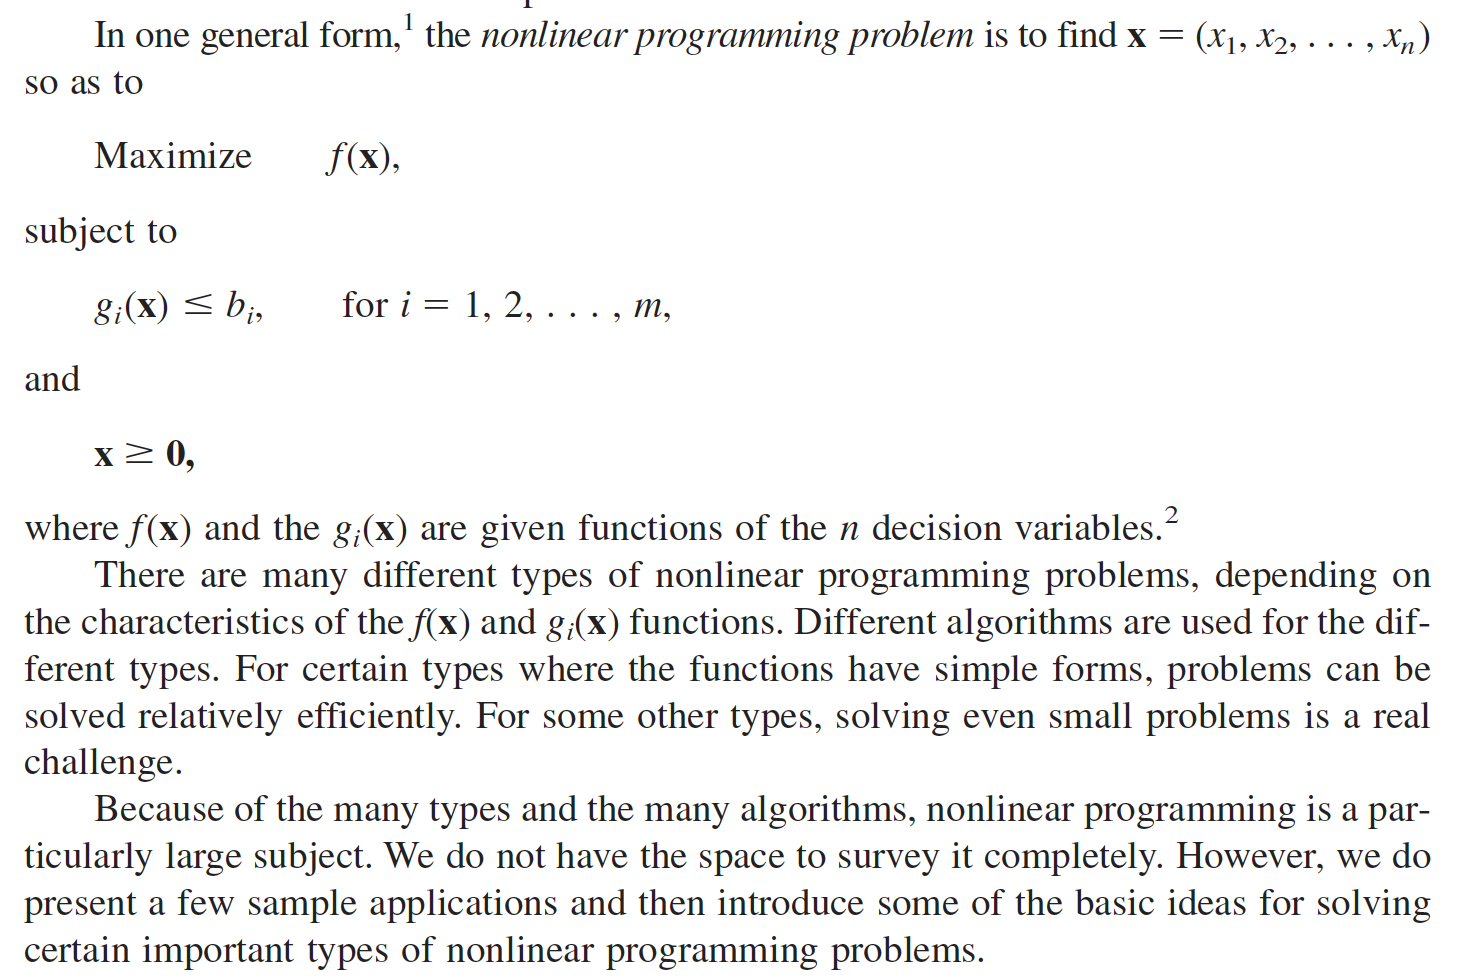

# Optimization via Gradient Descent


One such iterative numerical method is the [gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent).  It is an iterative process that converges to a local maximum or minimum relatively quickly.    Let $f(x)$ be the objective function that we are trying to optimize.  Then the gradient descent method will find the $x$'s where $f^{'}(x) == 0$ by employing the following steps:

- Step 0: Choose a random starting point, $x_0$.
- Step 1: Calculate $x_1 = x_0 - eta * f^{'}(x_0)$
- Step $i$ $ ...  $
- Step n: Calculate $x_n = x_{n-1} -  eta * f^{'}(x_{n-1})$
- Repeat: Until convergence.

In this process, each successive guess of $x_n$ gets closer to the $x$ where $f^{'}(x) = 0$ if the objective function $f(x)$ has a continuous second derivative (i.e. $f^{''}(x)$ is a continuous function).    

Gradient descent is also known as steepest descent. Below is an example of gradient descent in action when minimizing $ x^2$:

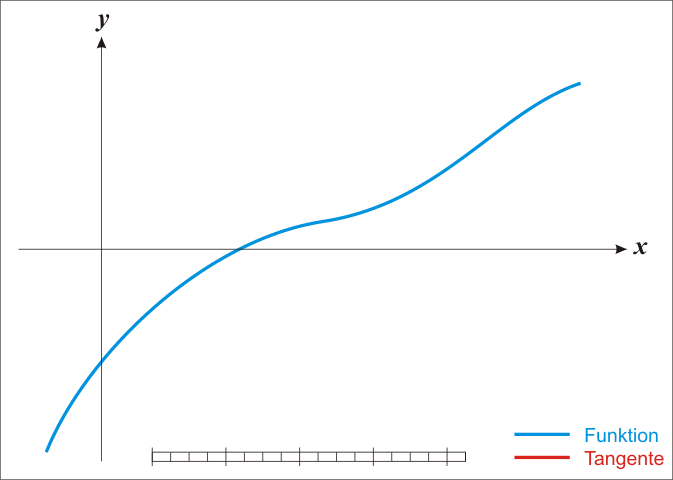

In [7]:
from IPython.display import Image
Image('./Images/NewtonIteration_Ani.gif', width=500, height=500)


## Task: By hand... find minimum of a univariate function $ Minimize \ 2x^2+4x$


Please complete during lab time!


Given the following objective function:
$ Minimize \ 2x^2+4x$

Find the value of $x$ (aka the value of our decision variable) that minimizes $2x^2+4x$. HINT use gradient descent.

Assume our  initial guess of $x=2$ and a stepsize  $α =0.1$


Minimize 2x2+4x

### Prepare the gradient function $f^{'}(x)$
* f(x) = $2x^2+4x$
* f’(x) = **please fill in**
* f’’(x) = **please fill in**

### Perform Gradient descent
Calculate the first several iterations (by hand) using the gradient descent method.

## Solution to Task: find minimum of a univariate function 
* Objective function f(x) = $2x^2+4x$   
* Gradient function f’(x) = 4x +4  
* Second derivate f’’(x) = 4

Find the zeros of $f^{'}(x)$ via gradient descent (NOTE not the objective function). 

| &emsp;&emsp;$ Iteration $&emsp;&emsp;| &emsp;&emsp; __$x_i$__ &emsp;&emsp;| &emsp;&emsp;&emsp;$f(x_i)= 4*x_i +4$ &emsp;&emsp;&emsp;&emsp; | &emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp; $Step Update = \\x_i - \alpha * (4*x_i +4) $ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; |&emsp;&emsp; &emsp; $x_{i+i}$ &emsp;&emsp; &emsp; |
|:--------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
|    1     | 2.0               |        $4*(2.0)+4$     |$2 - 0.1 * (4*(2.0)+4)$|      .7999        |
| 2 | .7999 | $4*(.7999)+4$ | $.7999 - 0.1 * (4*(.7999)+4)$ |  .0799   |
| 3 | .0799| $4*(.0799)+4$ |  $.0799 - 0.1 * (4*(.0799)+4)$ | -.3520 | 
|4 | -.3520| $4*(-.3520)+4$ | $-.3520 - 0.1 * (4*(-.3520)+4)$  | -.6112  |
| 5 | -.6112|$4*(-.6112)+4$| $-.6112 - 0.1 * (4*(-.6112)+4)$ | -.7667 |
| 6 | -.7667 | $4*(-.7667)+4$ | $-.7667 - 0.1 * (4*(-.7667)+4)$ | -.8600 |


The following graph was made using desmos.com:

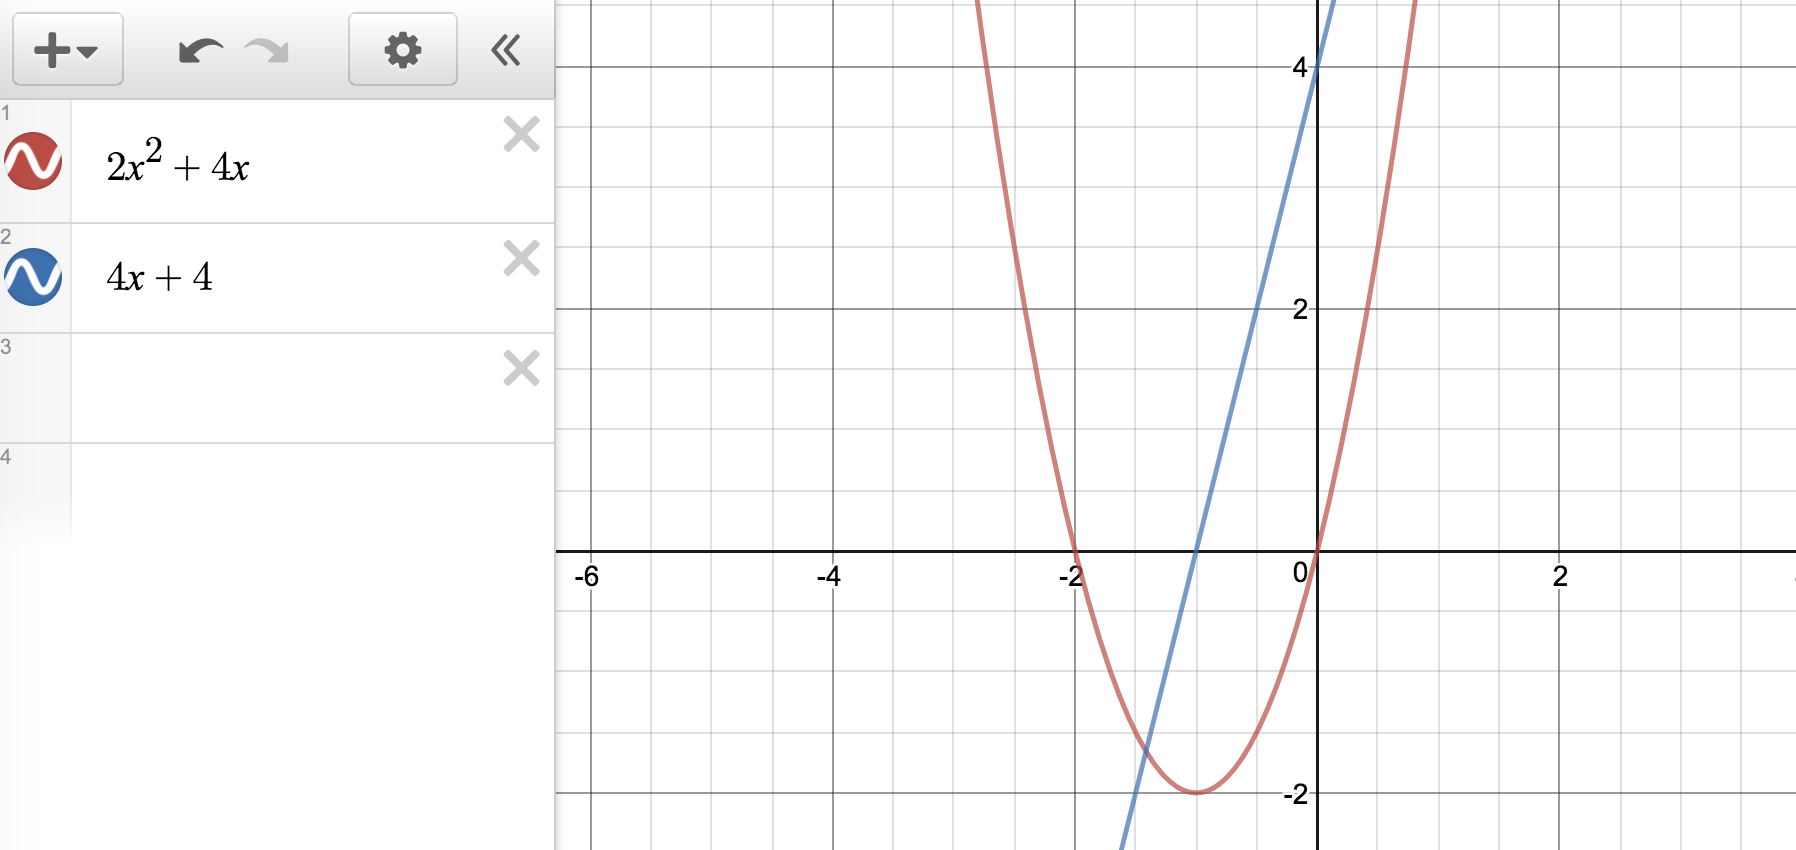

## CODE: Gradient Descent for a univariate function

In [1]:
from scipy.optimize import newton
from sklearn.utils.testing import assert_almost_equal

#Terminating criteria
# is f(x) == 0, i.e., a root of f(x)
def dx(f, x):
    return abs(0-f(x))

# find the zeros of the derivative function
# REPEAT find the zeros of the derivative function

eta = 0.1 # step size multiplier

#df is not used. WHY?
def gradientDescent(f, df, x0, e, print_res=False):
    delta = dx(f, x0)
    approximations = [x0]
    i=0
    while delta > e:
        x0 = x0 - eta * f(x0)
        if (i%10==0):
            approximations.append(x0)
        delta = dx(f, x0)
    if print_res:
        print ('Root is at: ', x0)
        print ('f(x) at root is: ', f(x0))
    return (x0, approximations)

### Example 1: Homegrown Gradient Descent  versus Scipy's Newton 
Using scipy's Newton to find the zero of the Gradient function


In [6]:
#Example 1: simple quadratic objective function
    
#Original objective function x**2 -4
#fprime = 2x  
#fprime2 = 2
#find the zeros of fprime

from scipy.optimize import newton
from sklearn.utils.testing import assert_almost_equal
import pandas as pd

def objectiveFunction (x):
    return x**2 - 4

def f(x):
   return 2*x 

def df(x):
   return 2 

#zero = newton(f, 1.0, fprime=df, maxiter=1000)
scipyRoot = newton(f, 2.7,  maxiter=100)  #vi scipy
(rootHomeGrown, trace) = gradientDescent(f, df,  2.7, 1e-5) #via homegrown
#print("Trace", trace)

# Print results to a table
table = pd.DataFrame(columns=[['Iteration','x_i','f(x_i)','Step Update (x_i+1 = x_i - alpha * f(x_i))', 'x_i+1']])
for i,t in enumerate(trace):
    if i+1 == len(trace):
        break
    else:
        grad_formula = '2 * {0}'.format(round(t,3))
        step_update = 'x_i+1 = {0} - {1} * ({2})'.format(round(t,3),eta,grad_formula)
        table.loc[i] = [i, round(t,3), grad_formula, step_update, round(trace[i+1],5)]

assert_almost_equal(rootHomeGrown, scipyRoot, decimal=5)
print ('We passed the unit test. Yay!')
print ("zero of f is %f scipy        " % scipyRoot)
print ("zero of f is %f via homegrown" % rootHomeGrown)
print('f(x=root), where f(x) is the gradient function : ', f(scipyRoot))
print('f(x=root), where f(x) is the objective function : ', objectiveFunction(scipyRoot))
table

We passed the unit test. Yay!
zero of f is 0.000000 scipy        
zero of f is 0.000004 via homegrown
f(x=root), where f(x) is the gradient function :  0.0
f(x=root), where f(x) is the objective function :  -4.0


Iteration    x_i     f(x_i) Step Update (x_i+1 = x_i - alpha * f(x_i))  \
0          0  2.700    2 * 2.7              x_i+1 = 2.7 - 0.1 * (2 * 2.7)   
1          1  2.160   2 * 2.16            x_i+1 = 2.16 - 0.1 * (2 * 2.16)   
2          2  1.728  2 * 1.728          x_i+1 = 1.728 - 0.1 * (2 * 1.728)   
3          3  1.382  2 * 1.382          x_i+1 = 1.382 - 0.1 * (2 * 1.382)   
4          4  1.106  2 * 1.106          x_i+1 = 1.106 - 0.1 * (2 * 1.106)   
5          5  0.885  2 * 0.885          x_i+1 = 0.885 - 0.1 * (2 * 0.885)   
6          6  0.708  2 * 0.708          x_i+1 = 0.708 - 0.1 * (2 * 0.708)   
7          7  0.566  2 * 0.566          x_i+1 = 0.566 - 0.1 * (2 * 0.566)   
8          8  0.453  2 * 0.453          x_i+1 = 0.453 - 0.1 * (2 * 0.453)   
9          9  0.362  2 * 0.362          x_i+1 = 0.362 - 0.1 * (2 * 0.362)   
10        10  0.290   2 * 0.29            x_i+1 = 0.29 - 0.1 * (2 * 0.29)   
11        11  0.232  2 * 0.232          x_i+1 = 0.232 - 0.1 * (2 * 0.232)   
12        12  0.186  2 * 0.186          x_i+1 = 0.186 - 0.1 * (2 * 0.186)   
13        13  0.148  2 * 0.148          x_i+1 = 0.148 - 0.1 * (2 * 0.148)   
14        14  0.119  2 * 0.119          x_i+1 = 0.119 - 0.1 * (2 * 0.119)   
15        15  0.095  2 * 0.095          x_i+1 = 0.095 - 0.1 * (2 * 0.095)   
16        16  0.076  2 * 0.076          x_i+1 = 0.076 - 0.1 * (2 * 0.076)   
17        17  0.061  2 * 0.061          x_i+1 = 0.061 - 0.1 * (2 * 0.061)   
18        18  0.049  2 * 0.049          x_i+1 = 0.049 - 0.1 * (2 * 0.049)   
19        19  0.039  2 * 0.039          x_i+1 = 0.039 - 0.1 * (2 * 0.039)   
20        20  0.031  2 * 0.031          x_i+1 = 0.031 - 0.1 * (2 * 0.031)   
21        21  0.025  2 * 0.025          x_i+1 = 0.025 - 0.1 * (2 * 0.025)   
22        22  0.020   2 * 0.02            x_i+1 = 0.02 - 0.1 * (2 * 0.02)   
23        23  0.016  2 * 0.016          x_i+1 = 0.016 - 0.1 * (2 * 0.016)   
24        24  0.013  2 * 0.013          x_i+1 = 0.013 - 0.1 * (2 * 0.013)   
25        25  0.010   2 * 0.01            x_i+1 = 0.01 - 0.1 * (2 * 0.01)   
26        26  0.008  2 * 0.008          x_i+1 = 0.008 - 0.1 * (2 * 0.008)   
27        27  0.007  2 * 0.007          x_i+1 = 0.007 - 0.1 * (2 * 0.007)   
28        28  0.005  2 * 0.005          x_i+1 = 0.005 - 0.1 * (2 * 0.005)   
29        29  0.004  2 * 0.004          x_i+1 = 0.004 - 0.1 * (2 * 0.004)   
30        30  0.003  2 * 0.003          x_i+1 = 0.003 - 0.1 * (2 * 0.003)   
31        31  0.003  2 * 0.003          x_i+1 = 0.003 - 0.1 * (2 * 0.003)   
32        32  0.002  2 * 0.002          x_i+1 = 0.002 - 0.1 * (2 * 0.002)   
33        33  0.002  2 * 0.002          x_i+1 = 0.002 - 0.1 * (2 * 0.002)   
34        34  0.001  2 * 0.001          x_i+1 = 0.001 - 0.1 * (2 * 0.001)   
35        35  0.001  2 * 0.001          x_i+1 = 0.001 - 0.1 * (2 * 0.001)   
36        36  0.001  2 * 0.001          x_i+1 = 0.001 - 0.1 * (2 * 0.001)   
37        37  0.001  2 * 0.001          x_i+1 = 0.001 - 0.1 * (2 * 0.001)   
38        38  0.001  2 * 0.001          x_i+1 = 0.001 - 0.1 * (2 * 0.001)   
39        39  0.000    2 * 0.0              x_i+1 = 0.0 - 0.1 * (2 * 0.0)   
40        40  0.000    2 * 0.0              x_i+1 = 0.0 - 0.1 * (2 * 0.0)   
41        41  0.000    2 * 0.0              x_i+1 = 0.0 - 0.1 * (2 * 0.0)   
42        42  0.000    2 * 0.0              x_i+1 = 0.0 - 0.1 * (2 * 0.0)   
43        43  0.000    2 * 0.0              x_i+1 = 0.0 - 0.1 * (2 * 0.0)   
44        44  0.000    2 * 0.0              x_i+1 = 0.0 - 0.1 * (2 * 0.0)   
45        45  0.000    2 * 0.0              x_i+1 = 0.0 - 0.1 * (2 * 0.0)   
46        46  0.000    2 * 0.0              x_i+1 = 0.0 - 0.1 * (2 * 0.0)   
47        47  0.000    2 * 0.0              x_i+1 = 0.0 - 0.1 * (2 * 0.0)   
48        48  0.000    2 * 0.0              x_i+1 = 0.0 - 0.1 * (2 * 0.0)   
49        49  0.000    2 * 0.0              x_i+1 = 0.0 - 0.1 * (2 * 0.0)   
50        50  0.000    2 * 0.0              x_i+1 = 0.0 - 0.1 * (2 * 0.0)   

### NOTE on Learning Rate:
The above piece of code has to be modified with regard to step size according to the system at hand and convergence can be made faster by using an adaptive step size. In the above case the step size is not adaptive. It stays at 0.01 in all the directions which can sometimes cause the method to fail by diverging from the minimum.

### TASK: Try different learning rates in the code above and see how it affects the output

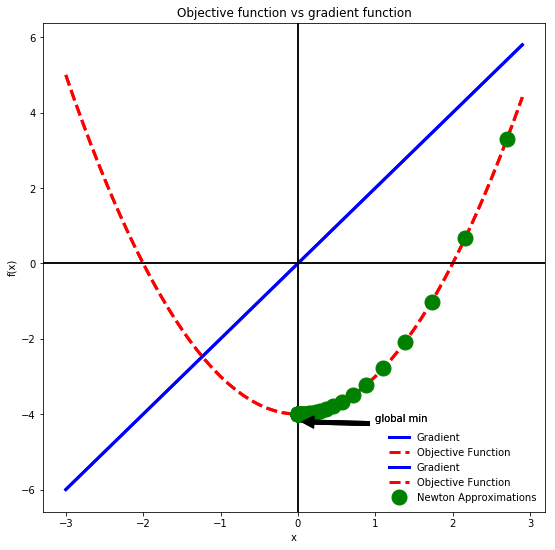

In [21]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(-3.0, 3.0, 0.1)


plt.figure(1, figsize=[9,9]) #7 by 7 inches
plt.plot(xs, f(xs), 'b', linewidth = 3, label='Gradient')
plt.plot(xs, objectiveFunction(xs), 'r--', linewidth = 3, label = 'Objective Function')
#plt.ylim([-2,5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.annotate('global min', xy=(scipyRoot, objectiveFunction(scipyRoot)-0.2), 
             xytext=(scipyRoot+1, objectiveFunction(scipyRoot)-0.2),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.plot(scipyRoot, objectiveFunction(scipyRoot), "bo")
plt.plot(trace, list(map(objectiveFunction, trace)), "go", markersize=15, label = 'Newton Approximations')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Objective function vs gradient function')
plt.legend(loc='lower right', frameon=False)

plt.show()

### Another example with a more interesting function

In [15]:
from scipy.optimize import newton
from sklearn.utils.testing import assert_almost_equal

#Terminating criteria
# is f(x) == 0, i.e., a root of f(x)
def dx(f, x):
    return abs(0-f(x))

# find the zeros of the derivative function
# REPEAT find the zeros of the derivative function

eta = 0.1 # step size multiplier

#df is not used. WHY?
def gradientDescent(f, df, x0, e, print_res=False):
    delta = dx(f, x0)
    approximations = [x0]
    i=0
    while delta > e:
        x0 = x0 - eta * f(x0)
        if (i%10==0):
            approximations.append(x0)
        delta = dx(f, x0)
    if print_res:
        print ('Root is at: ', x0)
        print ('f(x) at root is: ', f(x0))
    return (x0, approximations)


from scipy.optimize import newton
from sklearn.utils.testing import assert_almost_equal
#Example 2:
#Original objective function:  x^4 + 3x^3 + x^2 -x  
#Gradient function:  4x^3 + 9x^2 + 2x-1
#fprime2 12x**2 + 18x + 2

#find the zeros of gradient function (fprime)
from scipy.optimize import newton

def objectiveFunction (x):
    return x**4 + 3*x**3 + x**2 - x

#Gradient function
def f(x):
    return 4*x**3 + 9*x**2 + 2*x-1

def df(x):
    return 12*x**2 + 18*x + 2

#zero = newton(f, 1.0, fprime=df, maxiter=1000)
initialGuess = 1.5
scipyRoot = newton(f, initialGuess,  maxiter=100)  #vi scipy
(rootHomeGrown, newtonTrace) = gradientDescent(f, df,  initialGuess, 1e-5)  #Homegrown
#assert_almost_equal(rootHomeGrown, scipyRoot, decimal=5)
print ('We passed the unit test. Yay!')
print ("zero of f is %f scipy        " % scipyRoot)
print ("zero of f is %f via homegrown" % rootHomeGrown)
print('f(x=root), where f(x) is the gradient function : ', f(scipyRoot))
print('f(x=root), where f(x) is the objective function : ', objectiveFunction(scipyRoot))

We passed the unit test. Yay!
zero of f is 0.232240 scipy        
zero of f is -1.922225 via homegrown
f(x=root), where f(x) is the gradient function :  0.0
f(x=root), where f(x) is the objective function :  -0.13781766897853814


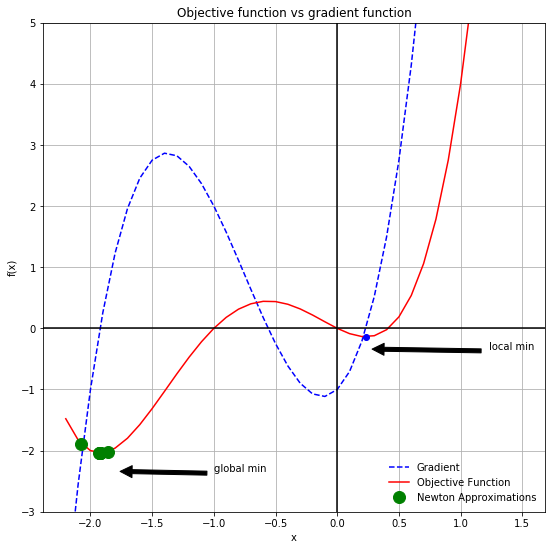

In [16]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(-2.2, 1.6, 0.1)

plt.figure(1, figsize=[9,9]) #7 by 7 inches
plt.plot(xs, f(xs), 'b--', label='Gradient')
plt.plot(xs, objectiveFunction(xs), 'r', label = 'Objective Function')
plt.ylim([-3,5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.annotate('local min', xy=(scipyRoot, objectiveFunction(scipyRoot)-0.2), 
             xytext=(scipyRoot+1, objectiveFunction(scipyRoot)-0.2),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('global min', xy=(-1.8, objectiveFunction(scipyRoot)-2.2), 
             xytext=(-1, objectiveFunction(scipyRoot)-2.2),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.plot(scipyRoot, objectiveFunction(scipyRoot), "bo")
plt.plot(newtonTrace, list(map(objectiveFunction, newtonTrace)), "go", markersize=12, label = 'Newton Approximations')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Objective function vs gradient function')
plt.legend(loc='lower right', frameon=False)

plt.show()

### NOTE on Learning Rate:
The above piece of code has to be modified with regard to step size according to the system at hand and convergence can be made faster by using an adaptive step size. In the above case the step size is not adaptive. It stays at 0.01 in all the directions which can sometimes cause the method to fail by diverging from the minimum.

# Bivariate Gradient Descent 

## Multivariable Unconstrained optimization via GD

For more details see [here](https://en.wikipedia.org/wiki/Gradient_descent)

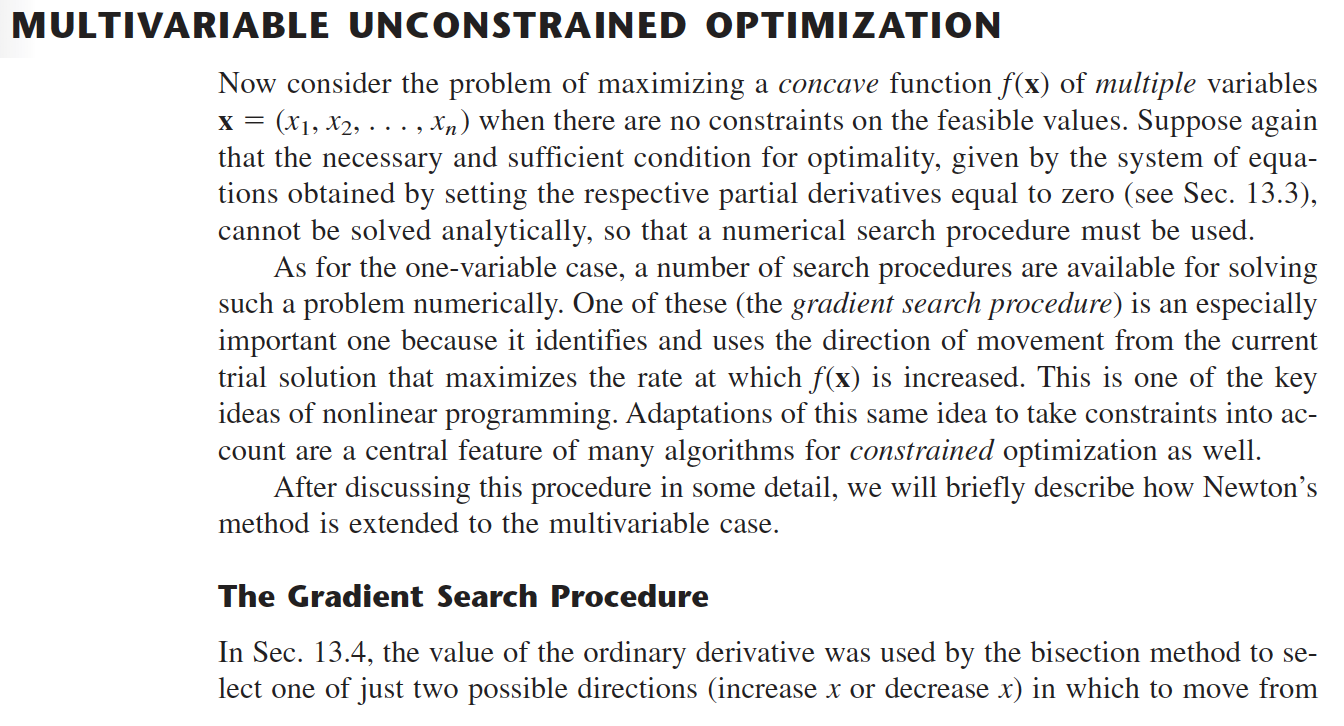

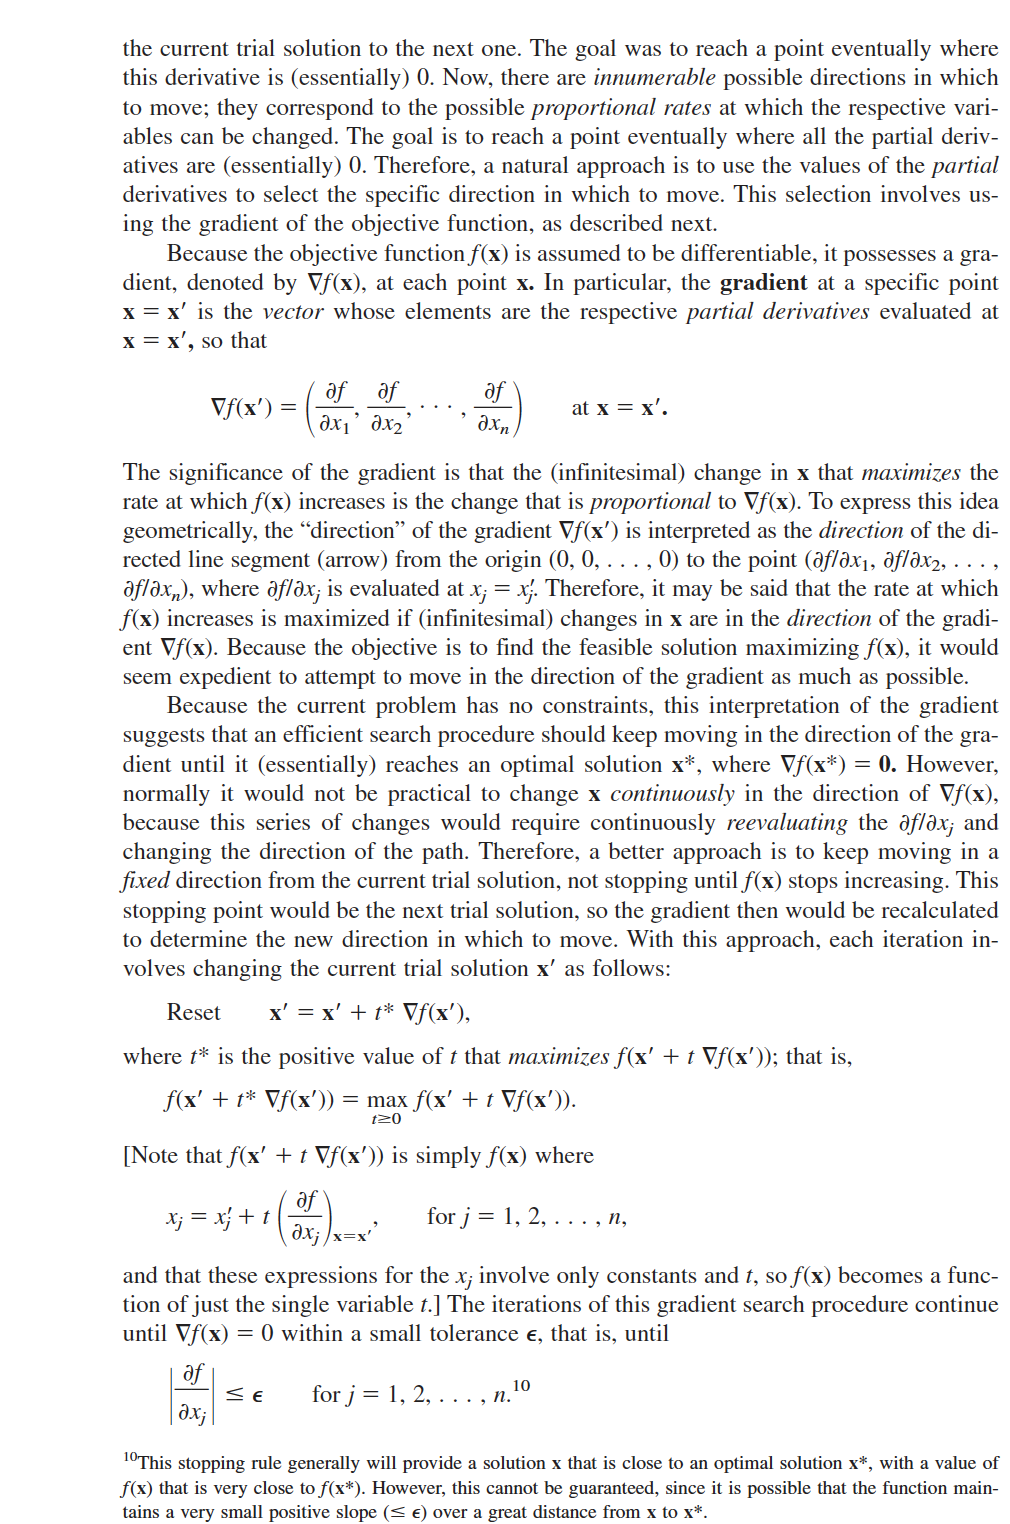

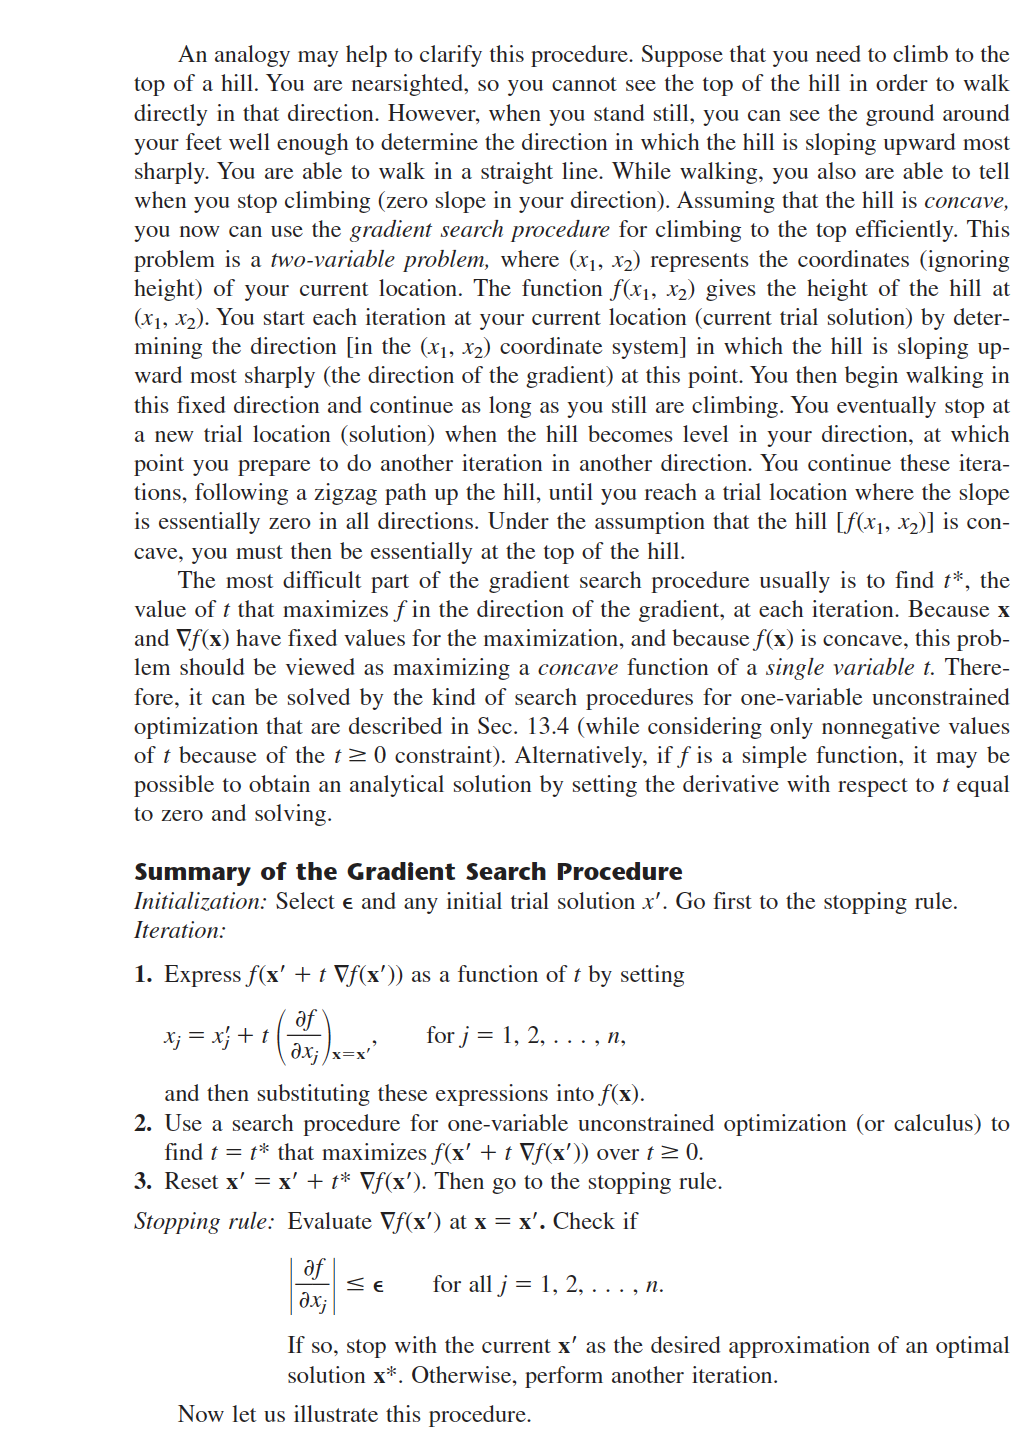

## Multivariable Gradient Descent Example on paper

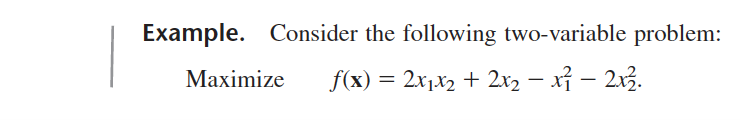

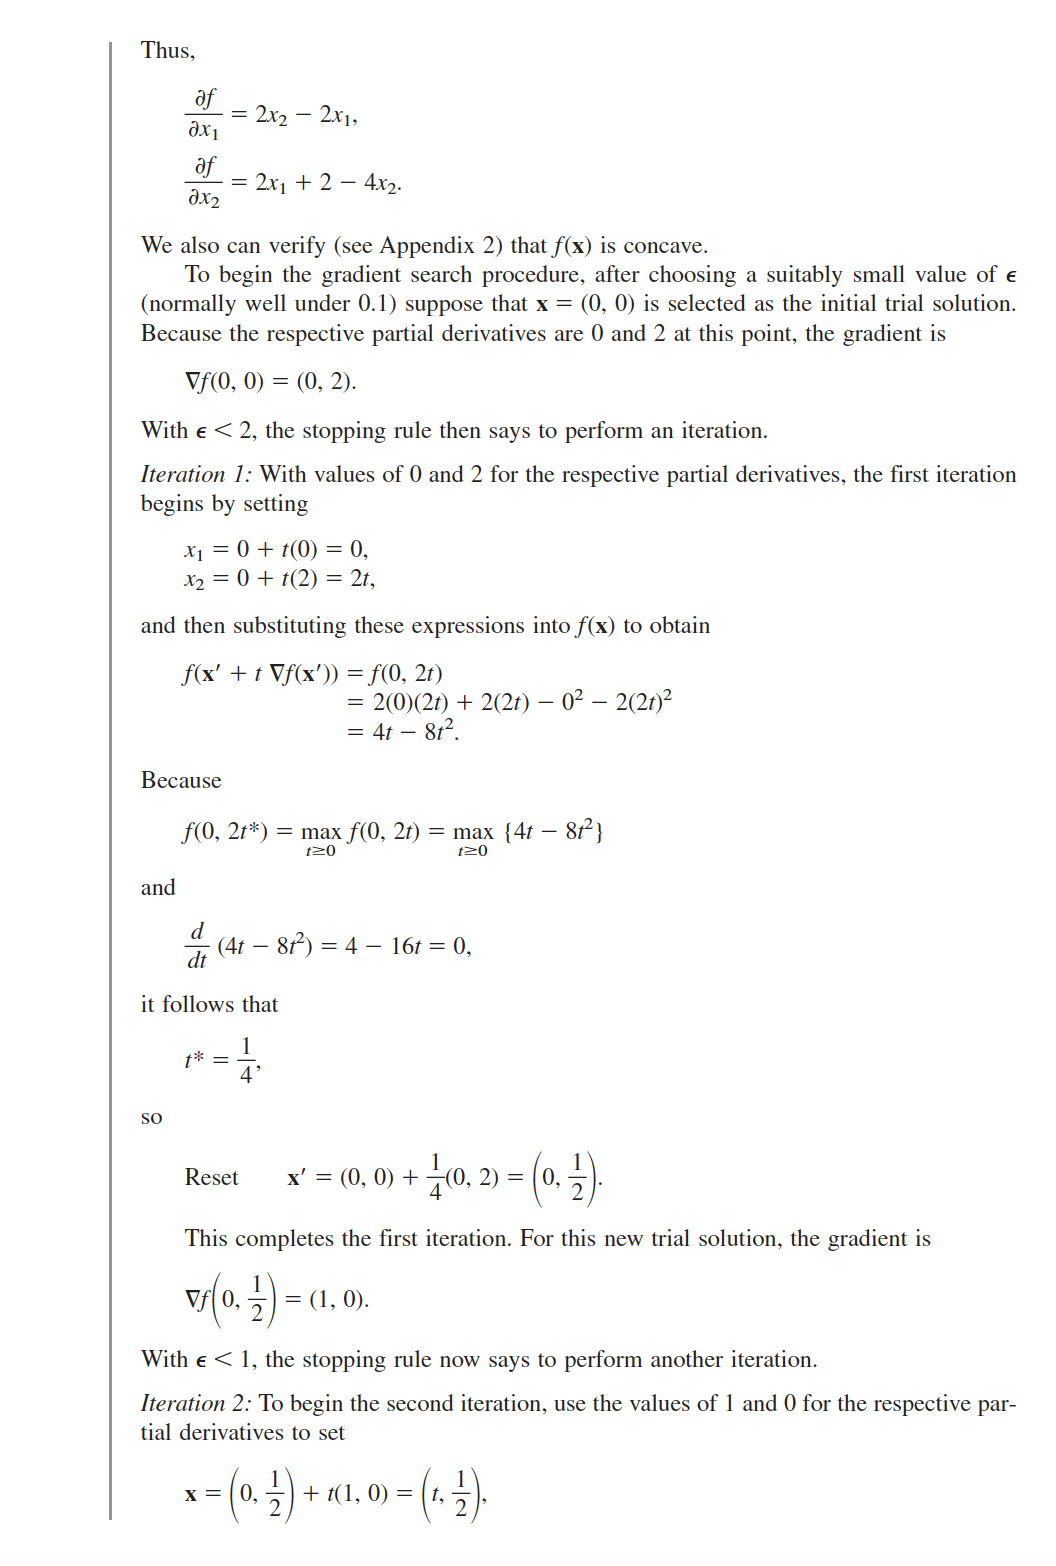

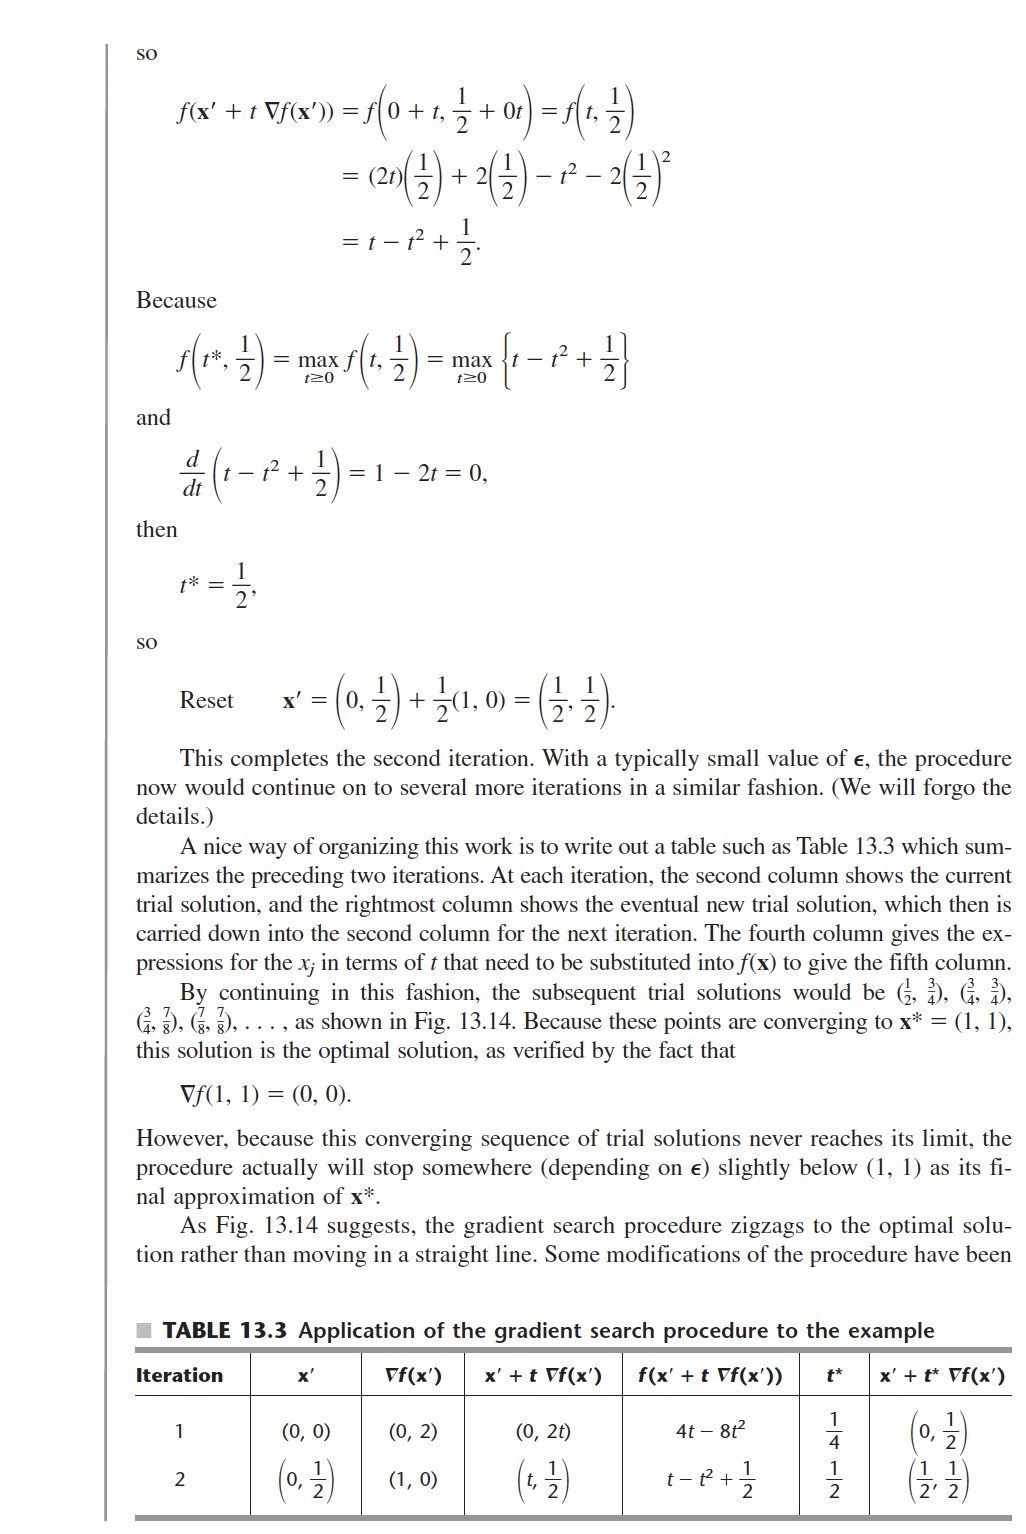

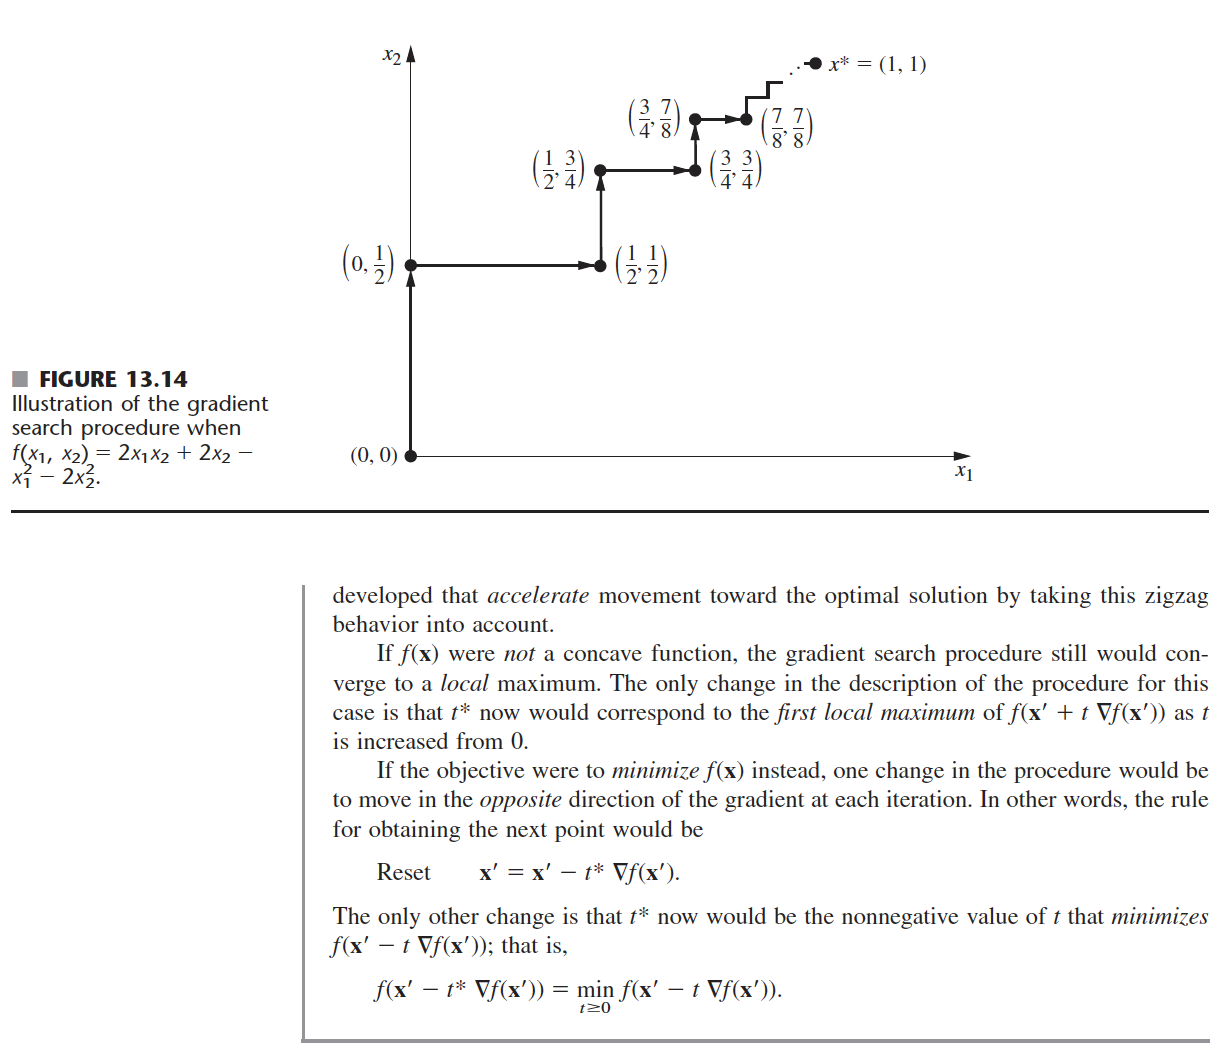

## Example explained
Consider a function of two variables 
 
$ F(x) = F(x_1, x_2) = (x_2 - x_1)^4 +8x_1x_2 - x_1 + x_2 + 3 $

1. 	Find all extreme (stationary) points. 
2. 	Test extreme points to determine all minima (not shown here).

Solution:
This function has the following stationary points: 

* $ x1=[-0.42 \ \ 0.42]^T, \  \ x2=[-0.13 \ \ 0.13]^T,$ and  $x3=[0.55 \ \ -0.55]^T $

which are determined as solutions to the equation  $\nabla f(x) $=0

   
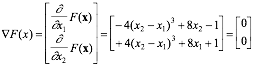
 

Next we test the stationary points x* for minima. A sufficient condition is that the Hessian of F at a minimum is positive definite. So, let us compute the Hessian matrix:

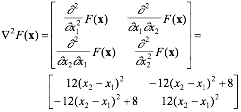

<img src="attachment:image.png", width="500" align="left"/>

## CODE Multivariable GD

### Disclaimer on code
The following code serves as a template for multivariable gradient descent. Please take this code as a basis for the TASKS outline below.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

class multivariate_GD(object):

    def __init__(self,func, gradient, hessian, start_point,step_size=0.8,num_iter=100,tol=0.000001):
        '''
        func: function to be optimized. Takes a vector argument as input and returns
              a scalar output
        step_size: step size in newton method update step
        num_iter: number of iterations for gradient descent to run
        tol: tolerance to determine convergence
        '''
        self.func=func
        self.gradient = gradient
        self.hessian = hessian
        self.start_point=np.array(start_point)
        self.num_iter=num_iter
        self.step_size=step_size
        self.tol=tol
        self.approach=[]

    def rootFinder(self):
        '''
        perform multivariate newton method for function with vector input
        and scalar output
        '''
        x_t=self.start_point
        self.approach.append(x_t)

        for i in range(self.num_iter):
            x_tplus1 = x_t - self.step_size * np.array(gradient(x_t))
            #print(x_tplus1)
            # check for convergence
            if abs(max(x_tplus1-x_t)) < self.tol:
                break
            x_t = x_tplus1
            self.approach.append(x_t)
        #else:   #report lack of  convergence  
        #    raise SolutionNotFound, "No convergence after %d iterations" % (self.num_iter)

        self.crit_point = x_tplus1
        self.max_min = self.func(x_t)

        return (self.crit_point, self.max_min)

    def critical_point(self):
        '''
        print critical point found in newton_method function. newton_method function
        must be called first.
        '''
        print (self.crit_point)
        

    def plot(self):
        samples = 100
        x0 = np.linspace(-1.0, 1.0, samples)
        x1 = np.linspace(-1.0, 1.0, samples)
        x0, x1 = np.meshgrid(x0, x1)
        D = np.empty((samples**2, samples**2))
        D[0] = np.reshape(x0, samples**2)
        D[1] = np.reshape(x1, samples**2)
        Z = self.func(D)
        Z = np.reshape(Z, (samples, samples))

        fig = plt.figure(figsize=(14,10))
        # ax = fig.add_subplot(111, projection='3d')
        ax = Axes3D(fig)
        
        # plot the approach
        T = np.transpose(self.approach)
        TZ = self.func(T)
        ax.plot(T[0], T[1], TZ, alpha = 0.5, marker='o', c='K')
        # ax.scatter(T[0], T[1], np.zeros(T.shape[1]), marker='o', c='K')

        # Plot the surface.
        # surf = ax.plot_surface(x0, x1, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        #                        alpha = 0.5, linewidth=0, antialiased=False)
        surf = ax.plot_surface(x0, x1, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                               alpha = 0.5, linewidth=0, antialiased=False)

        # Customize the z axis.
        ax.set_zlim(0., 15.)
        #ax.zaxis.set_major_locator(LinearLocator(6))
        #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

        # rotation of the graph
        ax.azim = 25
        ax.elev = 10

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=10)

        plt.title("Bivariate Gradient Descent")
        plt.axis((-1, 1, -1, 1))
        plt.xlabel("x1 Value")
        plt.ylabel("x2 Value")
        plt.show()
        
        # Contour plot of loss in parameter space
        plt.figure(figsize=(8, 8))
        cx = plt.subplot(1, 1, 1, facecolor='Silver')
        plt.grid(b=True, which='major', color='w', linestyle='-')
        plt.axis((-1, 1, -1, 1))
        plt.scatter(T[0], T[1], marker = 'o', c = 'k')
        plt.contour(x0, x1, Z, 
                    levels=np.logspace(0.01, 2.0, 20),
                    cmap = 'rainbow', linewidths = 2.0, alpha=0.65)
        plt.title("Bivariate Gradient Descent Countour")
        plt.xlabel("x1 Value")
        plt.ylabel("x2 Value")
        plt.show()
        
        return
    
if __name__ == '__main__':
    # run test
    
    #This following function 
    #     F(x) = F(x1, x2) = (x2 - x1)^4 +8x1x2 - x1 + x2 + 3
    # has the stationary points: 
    #    x1=[-0.42 0.42]T,   x2=[-0.13 0.13]T, and  x3=[0.55 -0.55]T

    def objectiveFunction(x):
        x1 = x[0]; x2 = x[1]
        return ( (x2 - x1)**4 + 8*x1*x2 - x1 + x2 + 3)

    def gradient(x): #the gradient vector for which we want to find the zeros
        x1 = x[0]; x2 = x[1]
        return ([-4*(x2 - x1)**3 + 8*x2 - 1,
                4*(x2 - x1)**3 + 8*x1  + 1])
    def hessian(x):
        x1 = x[0]; x2 = x[1]
        return ([[12*(x2 - x1)**2, -12*(x2 - x1)**2 + 8], 
                 [-12*(x2 - x1)**2,  -12*(x2 - x1)**2]])
    
    #Find candidate optima for the objective function via f (aka fprime) using Newton-Raphson
    # xzeroGuess = [-0.2, .4]
    xzeroGuess = [-0.9, -0.9]
    mvGD = multivariate_GD(objectiveFunction,gradient, hessian, xzeroGuess, step_size=0.01,num_iter=100)
    anOptimum = mvGD.rootFinder() #find an optimum
    print("a potential optimum is located at: ", anOptimum)
    # local minima are   x1=[-0.42 0.42]T,   x2=[-0.13 0.13]T, and  x3=[0.55 -0.55]T

a potential optimum is located at:  (array([ 0.55336464, -0.55379523]), 0.9438274855561759)


## Plot the objective function and trace

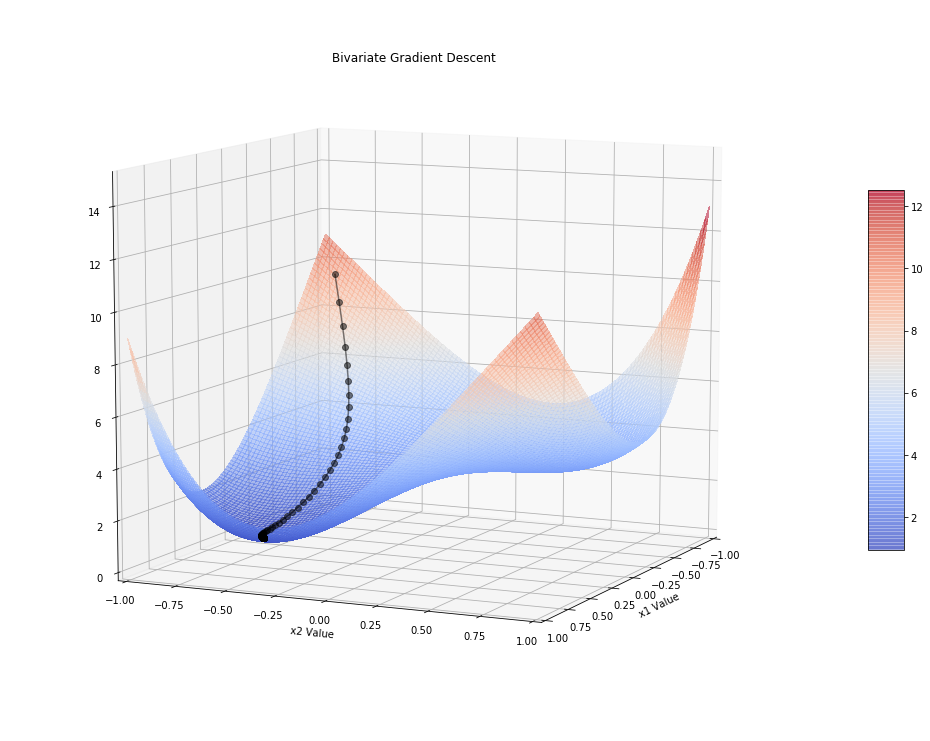

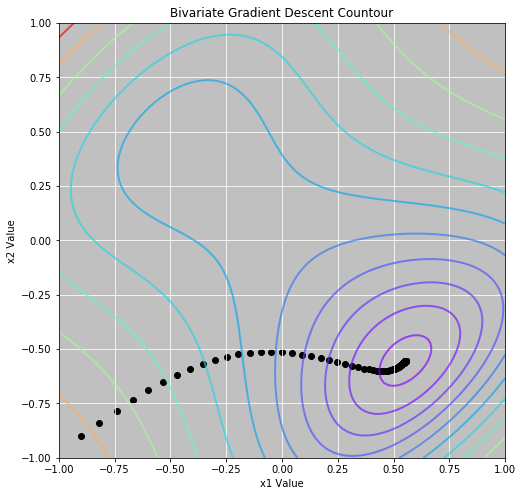

In [2]:
    mvGD.plot()

# TASK: Bivariate Gradient Ascent

Consider the following two-variable problem:
$\ Maximize \ \ f(X) = 2x_1x_2 + 2x_2 - x_1^2 - 2x_2^2 $


Using the gradient search procedure that you have coded by yourself (feel free to adapt the code given above), after choosing a suitably small value of $\epsilon$
(normally well under 0.1) and suppose that $x = (0, 0)$ is selected as the initial trial solution, final the maximimal value for $f(X)$. 

Plot the objective function in 3D (surface) and/or 2D (e.g., via a contour plot). Plot the trace of the gradient ascent algorithm.

# Univariate optimization via "numerical gradient" descent

Here we approximate the gradient calculation numerically. For more details see [here](https://en.wikipedia.org/wiki/Numerical_differentiation).

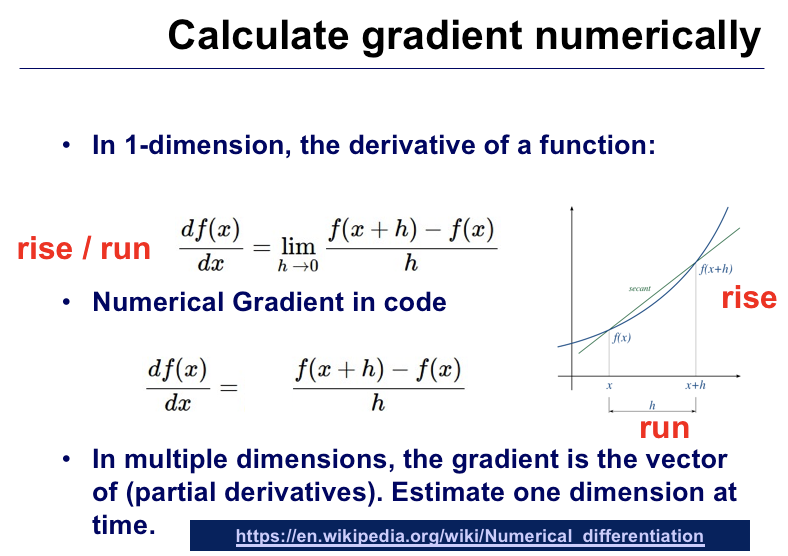

In [3]:
# The gradient descent algorithm is applied to find a local minimum of the 
# function f(x)=x4−3x3+2, with derivative f'(x)=4x3−9x2.
# From calculation, it is expected that the local minimum occurs at x=9/4


def objectiveFunction (x):
    return x**2 - 4

# Assume we dont calculus so we approximate the gradient as rise/run (see above)
# Gradient = (objectiveFunction(prev_x + h) - objectiveFunction(prev_x)) / h
def numericalGradient (objectiveFunction, h, x):
    return (objectiveFunction(x + h) - objectiveFunction(x)) / h

def GradientDescentViaNumericalGradient():
    cur_x = 6 # The algorithm starts at x=6
    gamma = 0.01 # step size multiplier
    h = 0.001 # numerical gradient offset
    precision = 0.00001
    previous_step_size = cur_x
    
    while previous_step_size > precision:
        prev_x = cur_x
        cur_x += -gamma * numericalGradient (objectiveFunction, h, prev_x) 
        previous_step_size = abs(cur_x - prev_x)

    print("The local minimum occurs at %f" % cur_x)
GradientDescentViaNumericalGradient()


def GradientDescentViaNumericalGradient_one_liner():
    cur_x = 6 # The algorithm starts at x=6
    gamma = 0.01 # step size multiplier
    h = 0.001 # numerical gradient offset
    precision = 0.00001
    previous_step_size = cur_x
    while previous_step_size > precision:
        prev_x = cur_x
        cur_x += -gamma * (objectiveFunction(prev_x + h) - objectiveFunction(prev_x)) / h
        previous_step_size = abs(cur_x - prev_x)

    print("OneLiner The local minimum occurs at %f" % cur_x)
GradientDescentViaNumericalGradient_one_liner()
# RESPONSE: The local minimum occurs at 0

The local minimum occurs at -0.000011
OneLiner The local minimum occurs at -0.000011


## Bivariate optimization via "numerical gradient" descent

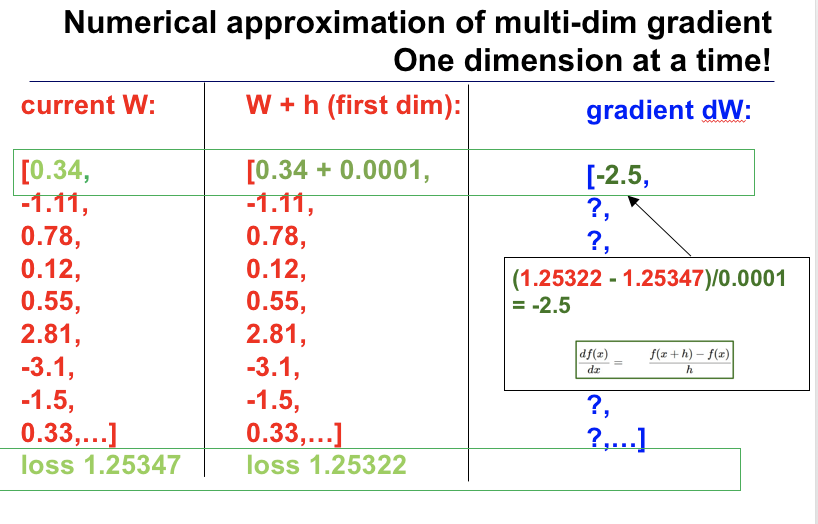

In [4]:
cur_x0 = 6 # The algorithm starts at x=6
cur_x1 = 6 # The algorithm starts at x=6
gamma = 0.01 # step size multiplier
h = 0.001 # numerical gradient offset
precision = 0.00001

previous_step_size = cur_x0 + cur_x1

def objectiveFunction (x0, x1):
    return x0**2 - 2*x0*x1 + 3*x1**2 + 1

while previous_step_size > precision:
    prev_x0 = cur_x0
    prev_x1 = cur_x1
    cur_x0 += -gamma * (objectiveFunction(prev_x0 + h, prev_x1) - objectiveFunction(prev_x0, prev_x1)) / h
    cur_x1 += -gamma * (objectiveFunction(prev_x0, prev_x1 + h) - objectiveFunction(prev_x0, prev_x1)) / h
    previous_step_size = abs(cur_x0 - prev_x0) + abs(cur_x1 - prev_x1)
#   print("New x0, x1: %f %f, step %f, %f" % (cur_x0, cur_x1, abs(cur_x0 - prev_x0), abs(cur_x1 - prev_x1)))

print("The local minimum occurs at %f,%f" % (cur_x0, cur_x1))


The local minimum occurs at -0.000910,-0.000756


# Optimization via Newton-Raphson

## Univariate optimization using Newton-Raphson

Newton’s method is an old numerical approximation technique that could be used to find the roots of complex polynomials and any differentiable function.

## The Newton-Raphson Method for find roots <a name="5"></a>
[Back to Table of Contents](#TOC)

Given an objective function f, to find candidate optima 

Algorithm to determine maxima or minima
1. **Find roots** of f’(x) #roots of gradient function
   * **Locate Turning Points** (candidate Max, Min) (Note Newton uses f’(x) and f’’(x)) yields that value of the objective function i.e., f(xroot)
   * **Is candidate max or min?** 
     * use f’’(x) to determine if candidate is a max or min


How do we find the points where the first derivative equals zero?  Or in mathematical language, how do we find the roots of an equation?  Sometimes we can directly solve the equations of the first order conditions.  In such a case, we say there is a **closed-form solution**, as we saw above.  Generally, there is no closed-form solution. In such cases, we will resort to iterative numerical approaches such as Newton-Raphson (aka Newton) or gradient descent to find the solution. 

One such iterative numerical method is the [Newton-Raphson Method](https://en.wikipedia.org/wiki/Newton%27s_method).  It is an iterative process that converges to a local maximum or minimum relatively quickly.    Let $f(x)$ be the objective function that we are trying to optimize.  Then the Newton-Raphson Method will find the $x$'s where $f^{'}(x) = 0$ by employing the following steps:

- Step 0: Choose a random starting point, $w_0$.
- Step 1: Calculate $x_1 = x_0 - \frac{f^{'}(x_0)}{f^{''}(x_0)}$
- Step n: Calculate $x_n = x_{n-1} - \frac{f^{'}(x_{n-1})}{f^{''}(x_{n-1})}$
- Repeat: Until convergence.

In this process, each successive guess of $x_n$ gets closer to the $x$ where $f^{'}(x) = 0$ if the objective function $f(x)$ has a continuous second derivative (i.e. $f^{''}(x)$ is a continuous function).    To see an animation of how the guesses of the Netwon-Raphson method converge to the root, click [here](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif).

## Newton-Raphson Method Explained (in text form, i.e., not code)*

*  The Newton-Raphson method is due to the great 17th-century mathematician and physicist, Sir Isaac Newton. While a young student at the University of Cambridge (England), Newton took advantage of the university being closed for two years (due to the bubonic plague that devastated Europe in 1664–65) to discover the law of universal gravitation and invent calculus (among other achievements). His development of calculus led to this method.


In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "Images/NewtonIteration_Ani.gif", width=600, height=600)

* Adapted from (Hillier and Lieberman)[https://www.dropbox.com/s/c0k4zdldz1qfefx/Introduction%20to%20Operations%20Research%2010th%20Ed%20%5B2015%5D-Chapter13-NonLinearProgramming.pdf?dl=0] (Chapter 13)

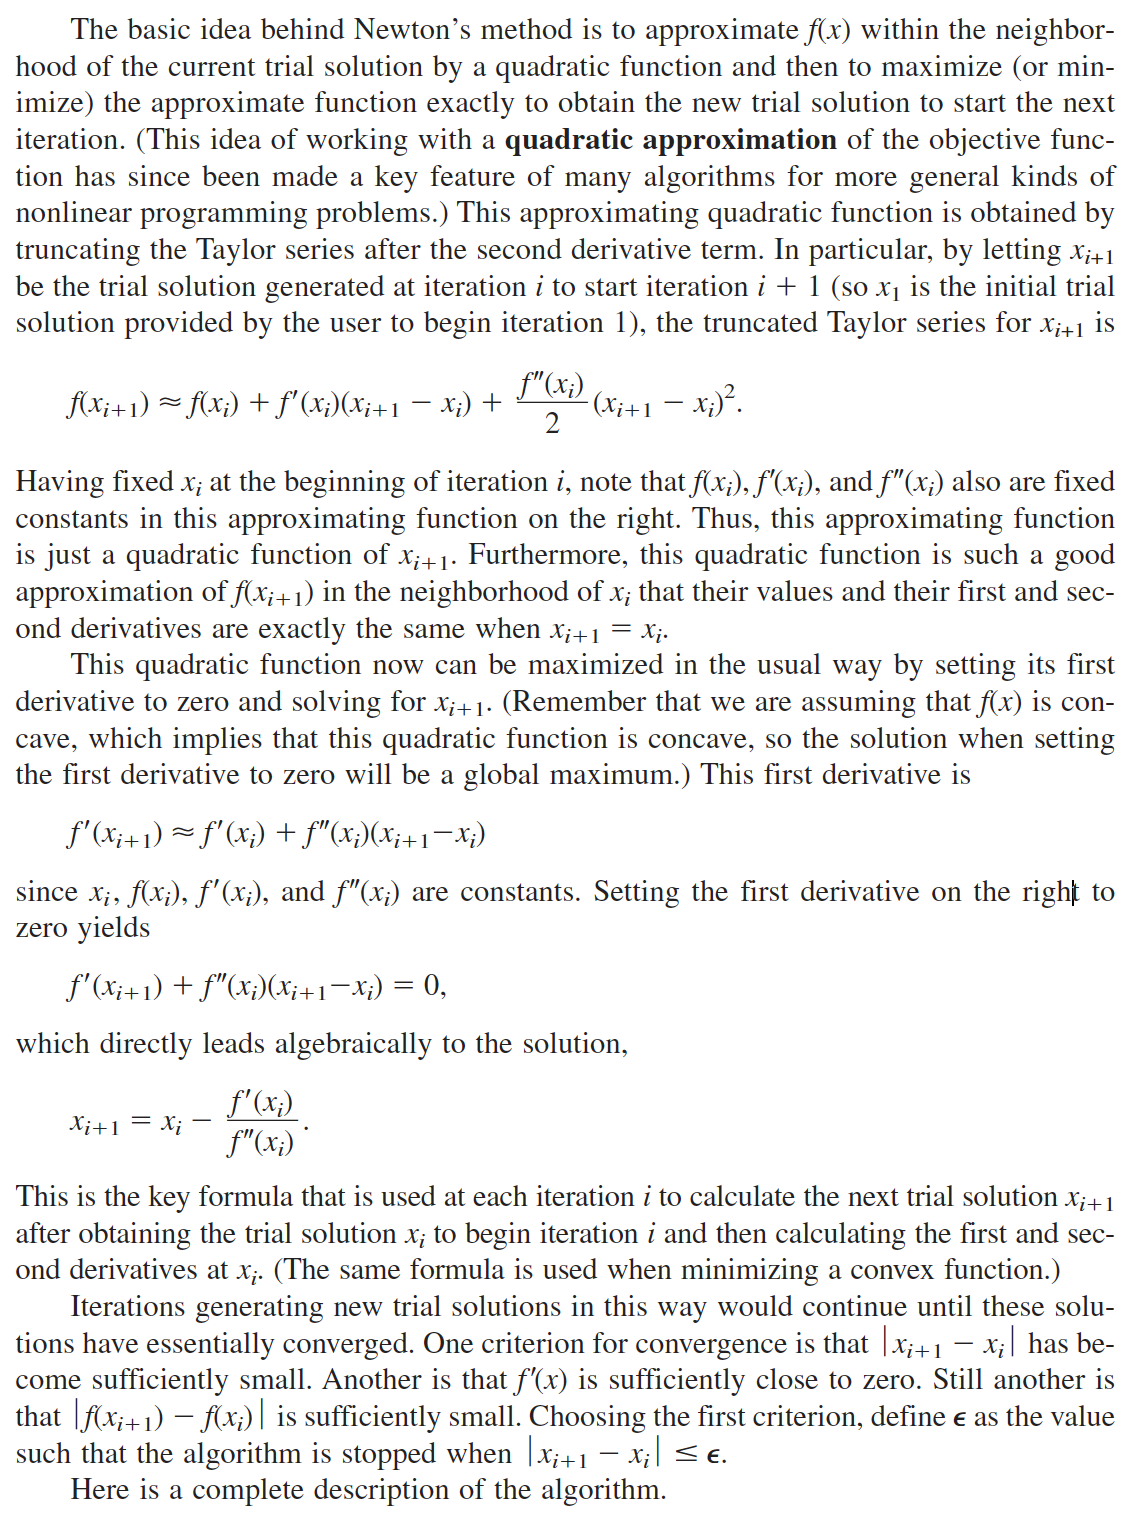

### Summary of Newton-Raphson
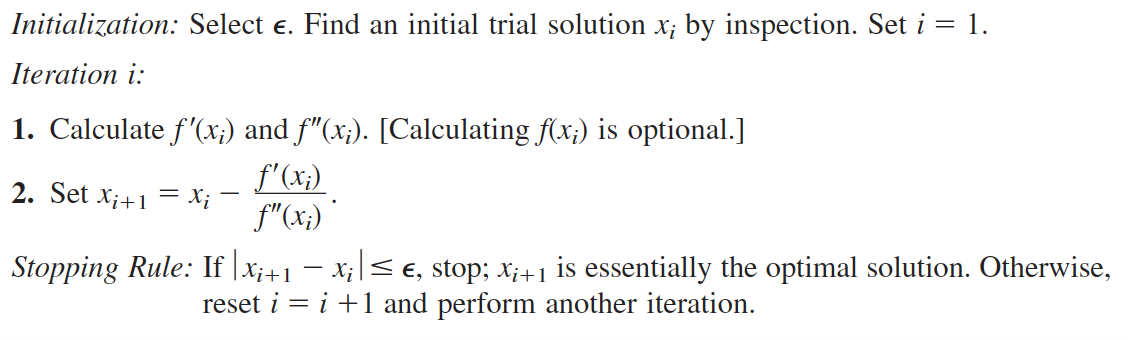

### Application of Newton-Raphson

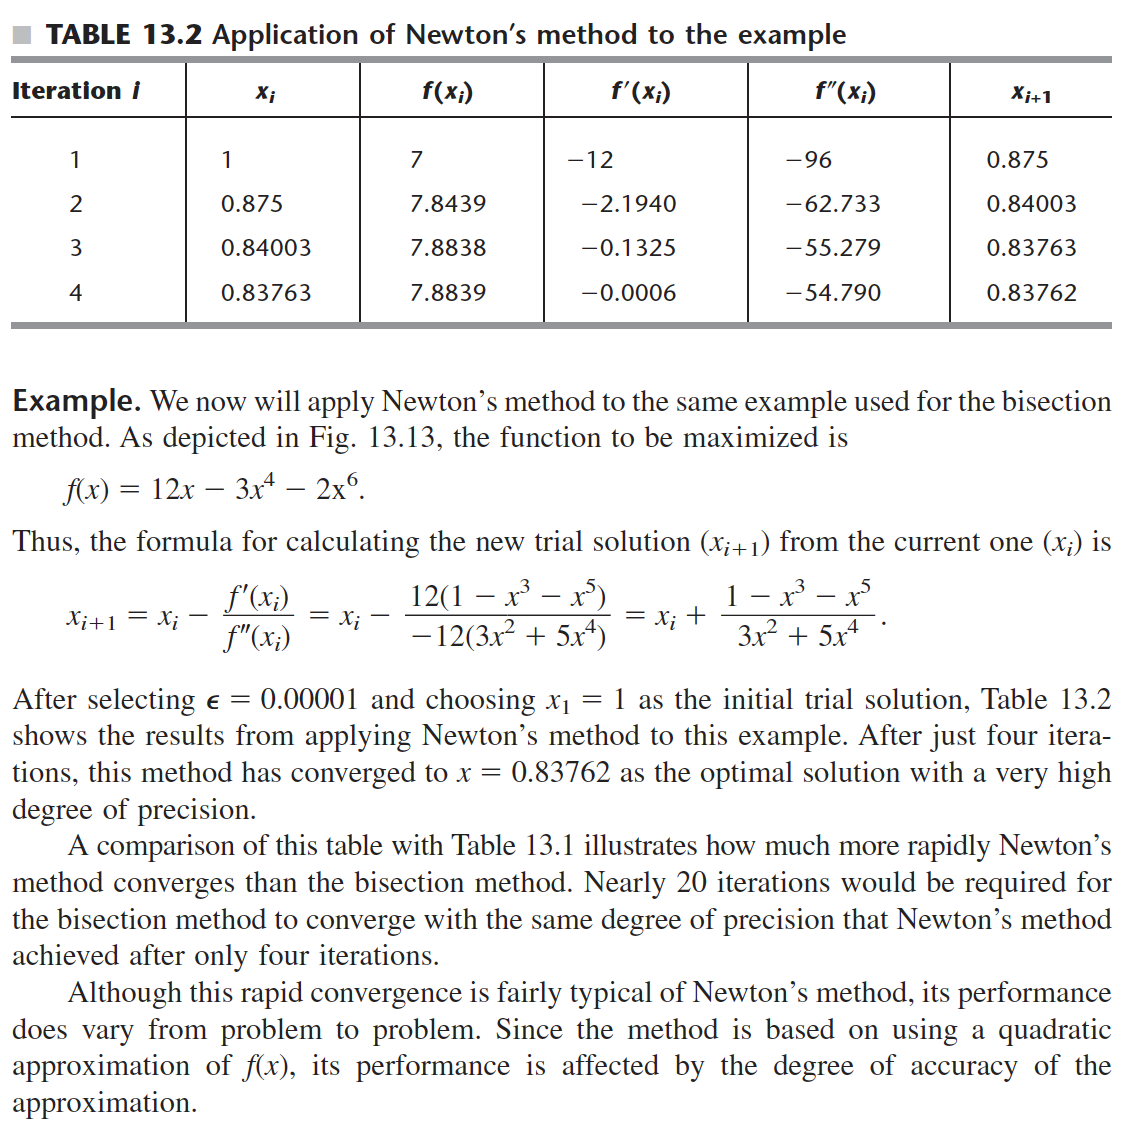

## CODE: Univariate optimization using Newton-Raphson

In [6]:
from scipy.optimize import newton
from sklearn.utils.testing import assert_almost_equal

#Terminating criteria
# is f(x) == 0, i.e., a root of f(x)
def dx(f, x):
    return abs(0-f(x))

# find the zeros of the derivative function
# REPEAT find the zeros of the derivative function

def newtonsHomeGrown(f, df, x0, e, print_res=False):
    delta = dx(f, x0)
    approximations = [x0] #root trace
    while delta > e:   #TODO max iterations
        x0 = x0 - f(x0)/df(x0)
        approximations.append(x0)
        delta = dx(f, x0)
    if print_res:
        print ('Root is at: ', x0)
        print ('f(x) at root is: ', f(x0))
    return (x0, approximations)

### Example 1: simple quadratic objective function using scipy's Newton 
Using scipy's Newton to find the zero of the Gradient function


In [7]:
#Example 1: simple quadratic objective function
    
#Original objective function x**2 -4
#fprime = 2x  
#fprime2 = 2
#find the zeros of fprime

from scipy.optimize import newton
from sklearn.utils.testing import assert_almost_equal\

def objectiveFunction (x):
    return x**2 - 4

def f(x):    #gradient Function (dprime)
   return 2*x 

def df(x):  #second derivative (dprime2)
   return 2 

#zero = newton(f, 1.0, fprime=df, maxiter=1000)
scipyRoot = newton(f, 2.7,  maxiter=100)  #vi scipy
(rootHomeGrown, newtonTrace) = newtonsHomeGrown(f, df,  2.7, 1e-5) #via homegrown
print("Trace", newtonTrace)
assert_almost_equal(rootHomeGrown, scipyRoot, decimal=5)
print ('We passed the unit test. Yay!')
print ("zero of f is %f scipy        " % scipyRoot)
print ("zero of f is %f via homegrown" % rootHomeGrown)
print('f(x=root), where f(x) is the gradient function : ', f(scipyRoot))
print('f(x=root), where f(x) is the objective function : ', objectiveFunction(scipyRoot))

Trace [2.7, 0.0]
We passed the unit test. Yay!
zero of f is 0.000000 scipy        
zero of f is 0.000000 via homegrown
f(x=root), where f(x) is the gradient function :  0.0
f(x=root), where f(x) is the objective function :  -4.0


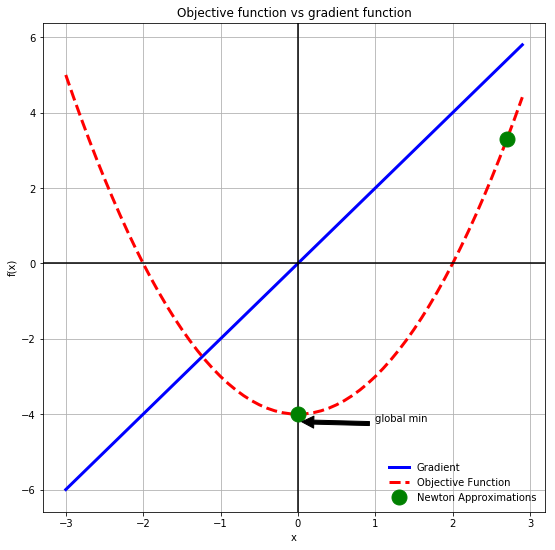

In [8]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(-3.0, 3.0, 0.1)

plt.figure(1, figsize=[9,9]) #7 by 7 inches
plt.plot(xs, f(xs), 'b', linewidth = 3, label='Gradient')
plt.plot(xs, objectiveFunction(xs), 'r--', linewidth = 3, label = 'Objective Function')
#plt.ylim([-2,5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.annotate('global min', xy=(scipyRoot, objectiveFunction(scipyRoot)-0.2), 
             xytext=(scipyRoot+1, objectiveFunction(scipyRoot)-0.2),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.plot(scipyRoot, objectiveFunction(scipyRoot), "bo")
plt.plot(newtonTrace, list(map(objectiveFunction, newtonTrace)), "go", markersize=15, label = 'Newton Approximations')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Objective function vs gradient function')
plt.legend(loc='lower right', frameon=False)

plt.show()

### TASK Univariate optimization in Newton-Raphson

1. Find the minimum of `4x**2 -13`.
   * plot the original and plot the gradient function and highlight the minimum.    
   * Is the minimum a global minimum? Why?  
   * Note that `4x**2 -13` is the objective function

### Example 2: super complex objective function using scipy's Newton 
Using scipy's Newton to find the zero of the Gradient function

In [9]:
from scipy.optimize import newton
#Example 2:
#Original objective function:  x^4 + 3x^3 + x^2 -x  
#Gradient function:  4x^3 + 9x^2 + 2x-1
#fprime2 12x**2 + 18x + 2

#find the zeros of gradient function (fprime)
from scipy.optimize import newton

def objectiveFunction (x):
    return x**4 + 3*x**3 + x**2 - x

#Gradient function
def f(x):
    return 4*x**3 + 9*x**2 + 2*x-1

def df(x):
    return 12*x**2 + 18*x + 2

#zero = newton(f, 1.0, fprime=df, maxiter=1000)
initialGuess = -0.7
scipyRoot = newton(f, initialGuess,  maxiter=100)  #vi scipy
(rootHomeGrown, newtonTrace) = newtonsHomeGrown(f, df,  initialGuess, 1e-5)  #Homegrown
assert_almost_equal(rootHomeGrown, scipyRoot, decimal=5)
print ('We passed the unit test. Yay!')
print ("zero of f is %f scipy        " % scipyRoot)
print ("zero of f is %f via homegrown" % rootHomeGrown)
print('f(x=root), where f(x) is the gradient function : ', f(scipyRoot))
print('f(x=root), where f(x) is the objective function : ', objectiveFunction(scipyRoot))


We passed the unit test. Yay!
zero of f is -0.560015 scipy        
zero of f is -0.560015 via homegrown
f(x=root), where f(x) is the gradient function :  0.0
f(x=root), where f(x) is the objective function :  0.44509696047442304


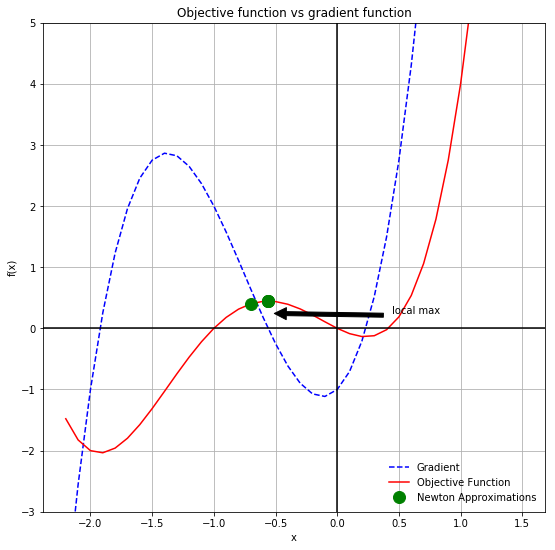

In [10]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(-2.2, 1.6, 0.1)


plt.figure(1, figsize=[9,9]) #7 by 7 inches
plt.plot(xs, f(xs), 'b--', label='Gradient')
plt.plot(xs, objectiveFunction(xs), 'r', label = 'Objective Function')
plt.ylim([-3,5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.annotate('local max', xy=(scipyRoot, objectiveFunction(scipyRoot)-0.2), 
             xytext=(scipyRoot+1, objectiveFunction(scipyRoot)-0.2),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.plot(scipyRoot, objectiveFunction(scipyRoot), "bo")
plt.plot(newtonTrace, list(map(objectiveFunction, newtonTrace)), "go", markersize=12, label = 'Newton Approximations')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Objective function vs gradient function')
plt.legend(loc='lower right', frameon=False)

plt.show()

###  Homegrown versus Scipy with multiple initial points

In [11]:
def test_with_scipy(f, df, x0s, e):
    for x0 in x0s:
        my_newton = newtonsHomeGrown(f, df, x0, e)
        scipy_newton = newton(f, x0, df, tol=e)
        assert_almost_equal(my_newton[0], scipy_newton, decimal=5)
        print ('Tests passed.')

if __name__ == '__main__':
    # run test
    x0s= [0, .5, 1.0]    
    test_with_scipy(f, df, x0s, 1e-5)
        
    for x0 in x0s:
        newtonsHomeGrown(f, df, x0, 1e-10, True)

Tests passed.
Tests passed.
Tests passed.
Root is at:  0.23223961861321984
f(x) at root is:  2.220446049250313e-15
Root is at:  0.23223961861321984
f(x) at root is:  2.220446049250313e-15
Root is at:  0.23223961861325704
f(x) at root is:  2.5623947408348613e-13


# Bivariate Newton-Raphson (feel free to ignore this section)

Consider a function of two variables 
 $\  F(x) = F(x_1, x_2) = (x_2 - x_1)^4 +8x_1x_2 - x_1 + x_2 + 3$

1. 	Find all extreme (stationary) points. 
2. 	Test extreme points to determine all minima (not shown here).

Solution:
This function has the following stationary points: 

* $ x1=[-0.42 \ \ 0.42]^T, \  \ x2=[-0.13 \ \ 0.13]^T,$ and  $x3=[0.55 \ \ -0.55]^T $

which are determined as solutions to the equation  $\nabla f(x) $=0

   
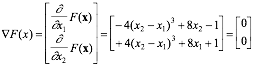
 

Next we test the stationary points x* for minima. A sufficient condition is that the Hessian of F at a minimum is positive definite. So, let us compute the Hessian matrix:
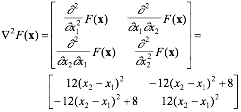



In [12]:
import numpy as np
# import numdifftools as nd

class multivariate_newton(object):

    def __init__(self,func, gradient, hessian, start_point,step_size=0.8,num_iter=100,tol=0.000001):
        '''
        func: function to be optimized. Takes a vector argument as input and returns
              a scalar output
        step_size: step size in newton method update step; not necessary
        num_iter: number of iterations for newton method to run
        tol: tolerance to determine convergence
        '''
        self.func=func
        self.gradient = gradient
        self.hessian = hessian
        self.start_point=np.array(start_point)
        self.num_iter=num_iter
        self.step_size=step_size
        self.tol=tol
        self.approach=[]

    def newton_method(self):
        '''
        perform multivariate newton method for function with vector input
        and scalar output
        '''
        x_t=self.start_point
        H=self.hessian
        g=self.gradient
        self.approach.append(x_t)
        
        for i in range(self.num_iter):
            x_tplus1 = x_t - self.step_size * np.dot(np.linalg.inv(hessian(x_t)), gradient(x_t))
            #check for convergence
            if abs(max(x_tplus1 - x_t)) < self.tol:
                break
            x_t = x_tplus1
            self.approach.append(x_t)
         
        #else:   #report lack of  convergence  
        #    raise SolutionNotFound, "No convergence after %d iterations" % (self.num_iter)

        self.crit_point = x_tplus1
        self.max_min = self.func(x_t)

        return (self.crit_point, self.max_min)

    def critical_point(self):
        '''
        print critical point found in newton_method function. newton_method function
        must be called first.
        '''
        print (self.crit_point)

    def plot(self):
        samples = 100
        x0 = np.linspace(-1.0, 1.0, samples)
        x1 = np.linspace(-1.0, 1.0, samples)
        x0, x1 = np.meshgrid(x0, x1)
        D = np.empty((samples**2, samples**2))
        D[0] = np.reshape(x0, samples**2)
        D[1] = np.reshape(x1, samples**2)
        Z = self.func(D)
        Z = np.reshape(Z, (samples, samples))

        fig = plt.figure(figsize=(14,10))
        # ax = fig.add_subplot(111, projection='3d')
        ax = Axes3D(fig)
        
        # plot the approach
        T = np.transpose(self.approach)
        TZ = self.func(T)
        ax.plot(T[0], T[1], TZ, alpha = 0.5, marker='o', c='K')
        # ax.scatter(T[0], T[1], np.zeros(T.shape[1]), marker='o', c='K')

        # Plot the surface.
        # surf = ax.plot_surface(x0, x1, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        #                        alpha = 0.5, linewidth=0, antialiased=False)
        surf = ax.plot_surface(x0, x1, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                               alpha = 0.5, linewidth=0, antialiased=False)

        # Customize the z axis.
        ax.set_zlim(0., 15.)
        #ax.zaxis.set_major_locator(LinearLocator(6))
        #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

        # rotation of the graph
        ax.azim = 25
        ax.elev = 10

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=10)

        plt.title("Bivariate Gradient Descent")
        plt.axis((-1, 1, -1, 1))
        plt.xlabel("x1 Value")
        plt.ylabel("x2 Value")
        plt.show()
        
        # Contour plot of loss in parameter space
        plt.figure(figsize=(8, 8))
        cx = plt.subplot(1, 1, 1, facecolor='Silver')
        plt.grid(b=True, which='major', color='w', linestyle='-')
        plt.axis((-1, 1, -1, 1))
        plt.scatter(T[0], T[1], marker = 'o', c = 'k')
        plt.contour(x0, x1, Z, 
                    levels=np.logspace(0.01, 2.0, 20),
                    cmap = 'rainbow', linewidths = 2.0, alpha=0.65)
        plt.title("Bivariate Gradient Descent Countour")
        plt.xlabel("x1 Value")
        plt.ylabel("x2 Value")
        plt.show()
        
        return


if __name__ == '__main__':
    # run test
    
    #This following function 
    #     F(x) = F(x1, x2) = (x2 - x1)^4 + 8x1x2 - x1 + x2 + 3
    # has the stationary points: 
    #    x1=[-0.42 0.42]T,   x2=[-0.13 0.13]T, and  x3=[0.55 -0.55]T

    def objectiveFunction(x):
        x1 = x[0]; x2=x[1]
        return ((x2 - x1)**4 + 8*x1*x2 - x1 + x2 + 3)

    def gradient(x): #the gradient vector for which we want to find the zeros
        x1 = x[0]; x2=x[1]  
        return (-4*(x2 - x1)**3 + 8*x2 - 1,
                4*(x2 - x1)**3 + 8*x1 + 1)
    
    def hessian(x):
        x1 = x[0]; x2=x[1]
        return ([[12*(x2 - x1)**2, 8-12*(x2-x1)**2],
                [8-12*(x2-x1)**2, 12*(x2 - x1)**2]])
    
    #Find candidate optima for the objective function via f (aka fprime) using Newton-Raphson
    #xzeroGuess = [0.75, -0.25]
    xzeroGuess = [0. ,-.9]
    mvNewton = multivariate_newton(objectiveFunction, gradient, hessian, xzeroGuess, step_size=0.1, num_iter=100)
    anOptimum = mvNewton.newton_method() #find an optimum
    print("a potential optimum is located here", anOptimum)
    # local minima are   x1=[-0.42 0.42]T,   x2=[-0.13 0.13]T, and  x3=[0.55 -0.55]T
    


a potential optimum is located here (array([ 0.55356597, -0.55358987]), 0.9438271159854308)


In [13]:
x_t = [0. ,-.9]
print(gradient(x_t))
print(np.linalg.inv(hessian(x_t)))
np.dot(np.linalg.inv(hessian(x_t)),gradient(x_t))

(-5.284, -1.9160000000000004)
[[0.10620629 0.01879371]
 [0.01879371 0.10620629]]


array([-0.5972028, -0.3027972])

## Plot the objective function and trace

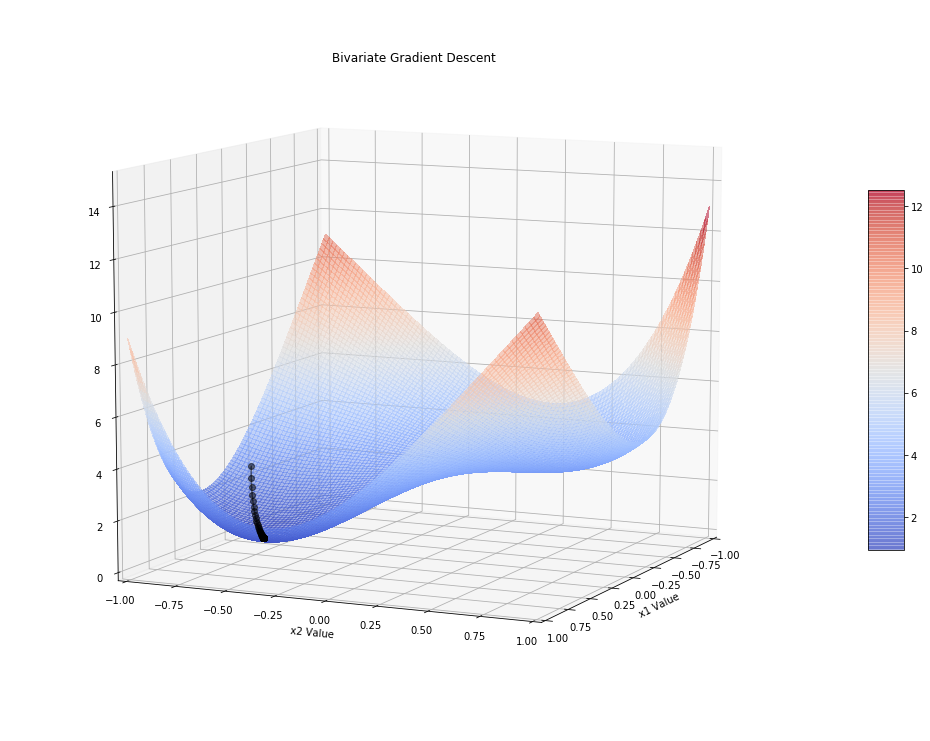

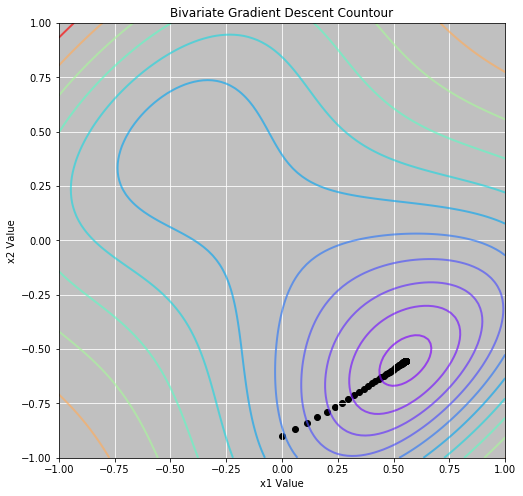

In [14]:
mvNewton.plot()

# TASK: Bivariate Newton-Raphson [Optional task]

Consider the following two-variable problem:
$\ Maximize \ \ f(X) = 2x_1x_2 + 2x_2 - x_1^2 - 2x_2^2 $


Using the Newton-Raphson procedure that you have coded by yourself (feel free to adapt the code given above), after choosing a suitably small value of $\epsilon$
(normally well under 0.1) and suppose that $x = (0, 0)$ is selected as the initial trial solution, final the maximimal value for $f(X)$. 

Plot the objective function in 3D (surface) and/or 2D (e.g., via a contour plot). Plot the trace of the Newton-Raphson ascent algorithm.

# Comparison with Python

Let’s get started by finding the minimum of the scalar function $\ f(x)=\exp[(x-0.7)^2]$.   

scipy.optimize.minimize_scalar() uses Brent’s method to find the minimum of a function:

In [15]:
from scipy import optimize

def f(x):
    return -np.exp(-(x - 0.7)**2)

result = optimize.minimize_scalar(f)
result.success # check if solver was successful

x_min = result.x
print(x_min) 

# response should be 0,7
x_min - 0.7


0.6999999997839409


-2.160590595323697e-10

# Machine Learning and optimization theory
It is natural to frame most supervised (and unsupervised) machine learning algorithms as a optimization problems. Please see lecture slides for a discussion on this. 